# Weight-Height Project

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
df = pd.read_csv('weight-height.csv')

In [47]:
df.head(4)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [49]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [50]:
df.Gender.value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

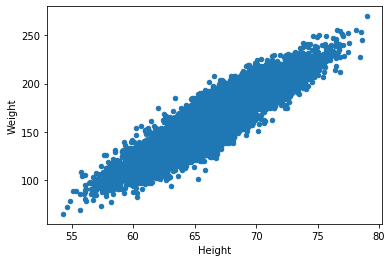

In [51]:
df.plot(kind='scatter',x='Height',y='Weight');

We can see the linear relationship between weight and height

In [52]:
males = df[df['Gender']=='Male']
females = df[df['Gender']=='Female']

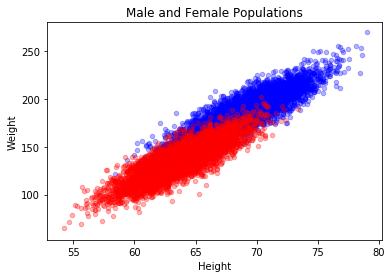

In [53]:
fig,ax = plt.subplots()
males.plot(kind='scatter',x='Height',y='Weight',
          ax=ax,color='blue',alpha=0.3,
          title='Male and Female Populations')
females.plot(kind='scatter',x='Height',y='Weight',
          ax=ax,color='red',alpha=0.3,
          title='Male and Female Populations');

As per the figure we can see the seperation between male and female and male has heigher height than that of female

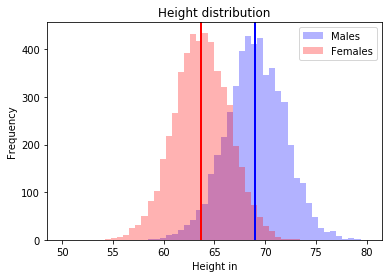

In [54]:
males['Height'].plot(kind='hist',bins=50,range=(50,80),alpha=0.3,color='blue')
females['Height'].plot(kind='hist',bins=50,range=(50,80),alpha=0.3,color='red')
plt.title('Height distribution')
plt.legend(['Males','Females'])
plt.xlabel('Height in')
plt.axvline(males['Height'].mean(),color='blue',linewidth=2)
plt.axvline(females['Height'].mean(),color='red',linewidth=2);

As expected men are taller than Females.The red and blue lines shows the mean of Female and Male height.

### Converting inches into feet in height column and pounds into kg in weight column

In [55]:
df['Height In Feet'] = df["Height"].astype(float) / 12
df['Weight In Kgs'] = df["Weight"].astype(float) / 2.205

df2 = df.drop(['Height','Weight'], axis="columns")
df2

,Gender,Height In Feet,Weight In Kgs
0,Male,6.153918,109.702296
1,Male,5.731825,73.610192
2,Male,6.175842,96.481114
3,Male,5.977582,99.792504
4,Male,5.823483,93.582676
...,...,...,...
9995,Female,5.514388,62.030591
9996,Female,5.588930,77.491114
9997,Female,5.322333,58.265451
9998,Female,5.752854,74.309506


In [56]:
df.Gender = df.Gender.apply(lambda x: 1 if x == 'Male' else 0)
df.head()

,Gender,Height,Weight,Height In Feet,Weight In Kgs
0,1,73.847017,241.893563,6.153918,109.702296
1,1,68.781904,162.310473,5.731825,73.610192
2,1,74.110105,212.740856,6.175842,96.481114
3,1,71.730978,220.042470,5.977582,99.792504
4,1,69.881796,206.349801,5.823483,93.582676


In [57]:
df = df.drop(['Height', 'Weight'], 1)
df

,Gender,Height In Feet,Weight In Kgs
0,1,6.153918,109.702296
1,1,5.731825,73.610192
2,1,6.175842,96.481114
3,1,5.977582,99.792504
4,1,5.823483,93.582676
...,...,...,...
9995,0,5.514388,62.030591
9996,0,5.588930,77.491114
9997,0,5.322333,58.265451
9998,0,5.752854,74.309506


# Building Model

In [68]:
X = df.iloc[:,0:2]
y = df.iloc[:, -1]

In [69]:
X.head()

,Gender,Height In Feet
0,1,6.153918
1,1,5.731825
2,1,6.175842
3,1,5.977582
4,1,5.823483


In [70]:
y.head()

0    109.702296
1     73.610192
2     96.481114
3     99.792504
4     93.582676
Name: Weight In Kgs, dtype: float64

Spliting into train and test set

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
len(X_train), len(X_test)

(8000, 2000)

In [73]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train,y_train)
linear.score(X_test, y_test)

0.9033321846361925

### Pickle

In [80]:
import pickle
pickle.dump(linear, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb')) 
model.predict([[1, 5.9]])

array([89.5927596])